In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print("Total X_train images:", len(X_train))
print("Total X_test images:", len(X_test))

11501568/11490434 [==============================] - 102s 9us/step
Total X_train images: 60000
Total X_test images: 10000


In [4]:
print("Shape of every image: ", X_train[0].shape)

Shape of every image:  (28, 28)


Y_train value of the image: 5


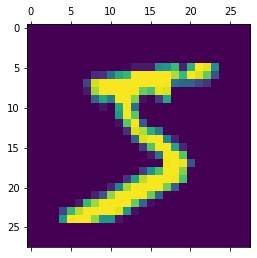

In [6]:
# Visualize the first number
print("Y_train value of the image:", y_train[0])
plt.matshow(X_train[0])
plt.show()

In [12]:
# Convert image pixels between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [13]:
# Flatten the 28x28 images
print("Before change:", X_train.shape)
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
print("After change:", X_train_flattened.shape)

Before change: (60000, 28, 28)
After change: (60000, 784)


In [14]:
# After changing to flatten array
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
# Create model and compile it
model = keras.Sequential([
    keras.layers.Dense(units=10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4726 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3041 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2832 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2665 - accuracy: 0.9260


In [17]:
# Evaluate the model on test dataset
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2657 - accuracy: 0.9251


[0.2657465934753418, 0.9251000285148621]

In [18]:
# Predict
model.predict(X_test_flattened)

array([[2.7105356e-02, 5.5515471e-07, 5.3634170e-02, ..., 9.9980992e-01,
        8.5548997e-02, 6.9811821e-01],
       [3.8166210e-01, 9.7105997e-03, 9.9955326e-01, ..., 6.2924633e-13,
        1.2475411e-01, 1.9108788e-09],
       [3.4024581e-04, 9.9528474e-01, 6.9014889e-01, ..., 1.6017605e-01,
        4.0737012e-01, 4.6005968e-02],
       ...,
       [2.4832095e-06, 6.9533785e-06, 9.8985794e-04, ..., 2.1231677e-01,
        4.6054277e-01, 7.4660355e-01],
       [5.9122729e-05, 1.9504788e-04, 1.2459490e-04, ..., 2.9068415e-05,
        6.1771727e-01, 7.8146717e-05],
       [7.6489290e-03, 5.1990318e-10, 1.9285110e-01, ..., 1.4734961e-08,
        1.3566171e-04, 5.0374746e-07]], dtype=float32)

Predicted values of the first image: [2.7105356e-02 5.5515471e-07 5.3634170e-02 9.5885223e-01 2.5407884e-03
 1.5528606e-01 3.1015629e-06 9.9980992e-01 8.5548997e-02 6.9811821e-01]
Max score goes to: 7


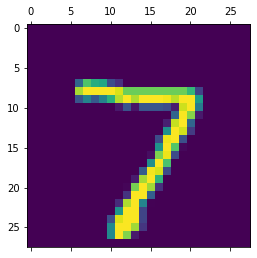

In [22]:
y_pred = model.predict(X_test_flattened)
print("Predicted values of the first image:", y_pred[0])
print("Max score goes to:", np.argmax(y_pred[0]))
plt.matshow(X_test[0])
plt.show()

tf.Tensor(
[[ 961    0    2    2    0    4    7    2    2    0]
 [   0 1118    3    2    0    1    4    2    5    0]
 [   7   11  923   16    9    4   12   10   36    4]
 [   2    0   21  917    0   29    2   10   21    8]
 [   1    2    4    1  911    0   11    4    8   40]
 [   9    3    4   22    9  795   14    3   27    6]
 [  11    3    7    1    7   14  911    2    2    0]
 [   1   10   24    7    8    0    0  942    1   35]
 [   6   15    6   20    9   37    9   10  853    9]
 [  11    7    1    9   25    8    0   23    5  920]], shape=(10, 10), dtype=int32)


NameError: name 'pl' is not defined

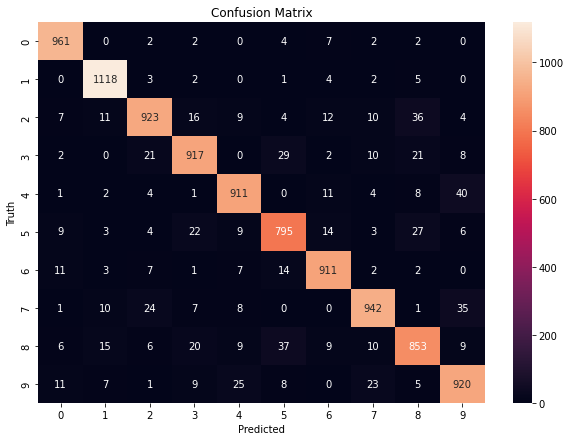

In [25]:
### Confusion matrix  ###
# First findout the max score values
y_predicted_labels = [np.argmax(i) for i in y_pred]
# Calculate the confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
print(cm)
# Visualize the result in better way
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [30]:
model = keras.Sequential([
#     If we don't want to flatten, then we can use keras buuld in method. Then we don't neet to specify the input_shape=(784,)
#     keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(units=10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2743 - accuracy: 0.9202
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1258 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0874 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0666 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0530 - accuracy: 0.9840


In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9751


[0.08439014106988907, 0.9750999808311462]

Predicted values of the first image: [1.7262310e-02 2.9426278e-04 7.8868824e-01 9.7472692e-01 1.2675069e-05
 3.2549037e-03 3.5411406e-07 9.9998438e-01 3.8604062e-02 2.4350475e-01]
Max score goes to: 7


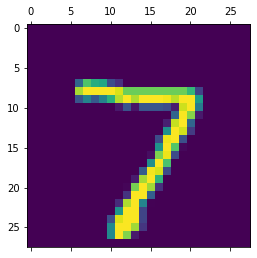

In [33]:
y_pred = model.predict(X_test_flattened)
print("Predicted values of the first image:", y_pred[0])
print("Max score goes to:", np.argmax(y_pred[0]))
plt.matshow(X_test[0])
plt.show()

tf.Tensor(
[[ 964    0    2    0    2    0    5    1    1    5]
 [   0 1125    4    0    0    2    2    0    2    0]
 [   3    3 1008    2    2    0    2    7    5    0]
 [   0    0    5  984    1    8    0    5    2    5]
 [   0    0    0    0  969    1    6    1    1    4]
 [   2    0    0    6    2  874    3    2    1    2]
 [   3    3    1    0    4    6  941    0    0    0]
 [   0    5   11    0    1    0    0 1009    0    2]
 [   4    2    8   11    9   10    3    9  912    6]
 [   1    5    0    6   18    2    0   11    1  965]], shape=(10, 10), dtype=int32)


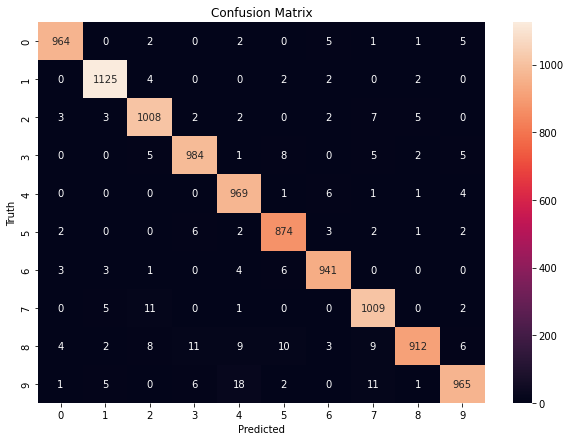

In [34]:
### Confusion matrix  ###
# First findout the max score values
y_predicted_labels = [np.argmax(i) for i in y_pred]
# Calculate the confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
print(cm)
# Visualize the result in better way
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()